In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("./Dataset/Train/Train.csv")
df_test = pd.read_csv("./Dataset/Test/Test.csv")
df_sample = pd.read_csv("./Dataset/Test/Sample_Submission.csv")

In [3]:
data_train = df_train.values

In [4]:
X_train = data_train[:,:-1]
Y_train = data_train[:,-1]
X_test = (df_test.values)[:,:]

In [5]:
Y_train = Y_train.reshape(Y_train.shape[0],1)

In [6]:
Y_train.shape

(1600, 1)

In [7]:
X_train.shape

(1600, 5)

In [8]:
def hypothesis(x,theta):
    return np.dot(x,theta.T)

def error(X,Y,theta):
    m = Y.shape[0]
    err = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        err += (hx-Y[i])**2
        
    return err/2

def gradient(X,Y,theta):
    grad = np.zeros((X.shape[1],))
    m = Y.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        for j in range(X.shape[1]):
            grad[j] += ((Y[i]-hx)*X[i][j])[0]
    
    return grad*0.5

def gradientDescent(X,Y,learning_rate=0.0022):
    theta = np.zeros((X.shape[1],))
    
    e = error(X,Y,theta)
    de = e
    error_list = [e]
    itr = 0
    
    while(itr<=100):
        grad = gradient(X,Y,theta)
        for j in range(X.shape[1]):
            theta[j] = theta[j] + learning_rate*grad[j]
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne - e
        e = ne
        itr += 1
        
    return theta,error_list

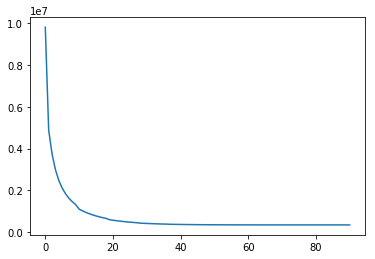

In [9]:
final_theta,error_list = gradientDescent(X_train,Y_train)
plt.plot(error_list)
plt.show()

In [10]:
hypothesis(X_test,final_theta)

array([ 1.10265936e+02,  1.12555577e+02, -2.61070346e+01, -4.93293850e+01,
       -1.01303779e+02, -5.01086402e+01, -8.12050894e+01,  1.91696507e+01,
        1.68307250e+02,  1.67817561e+02, -1.10432644e+02, -2.51261333e+01,
       -9.03597019e+00,  1.17312710e+02,  3.55754951e+01,  4.08143031e+01,
       -1.94785535e+02,  1.75708180e+01,  6.51505819e+00,  1.31106932e+02,
        6.03763249e+01, -6.70224592e+01, -1.13319219e+02, -1.31679786e+01,
       -6.24438215e+01,  7.74177147e+00,  2.44661073e+01,  1.03635441e+02,
        1.84319892e+01, -3.13900230e+01,  1.06631339e+02, -5.00609048e+01,
        2.12099853e+02, -1.98237156e+01, -2.33839085e+02,  1.49103913e+02,
       -7.30471685e+00,  7.92837652e+00, -3.12999612e+02,  7.28392641e+01,
       -8.64026678e+01, -2.11734433e+02, -2.43021937e+02,  1.28974012e+02,
       -7.88420555e+01,  9.92098556e+01, -8.48037808e+00,  1.57468857e+01,
       -1.02731078e+02, -3.25428675e+01,  6.34207313e+00, -1.79841049e+02,
        6.06012136e+01, -

In [11]:
df = pd.DataFrame(hypothesis(X_test,final_theta).reshape((-1,1)),columns=['target'])

In [12]:
df.to_csv("./Dataset/RegressionSubmisison/submission.csv")

## Using Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
gb_reg = GradientBoostingRegressor(max_features=5)

In [15]:
gb_reg.fit(X_train,Y_train)

/home/hacker/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
hyp2 = gb_reg.predict(X_test).reshape(-1,1)

In [17]:
df = pd.DataFrame(hyp2,columns=['target'])
df.to_csv("./Dataset/RegressionSubmisison/submission_gb.csv")

## Using Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dt_reg = DecisionTreeRegressor()

In [20]:
dt_reg.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [21]:
hyp3 = dt_reg.predict(X_test).reshape(-1,1)

In [22]:
df = pd.DataFrame(hyp3,columns=['target'])
df.to_csv("./Dataset/RegressionSubmisison/submission_dt.csv")

## Using Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf_reg = RandomForestRegressor()

In [25]:
rf_reg.fit(X_train,Y_train)

/home/hacker/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hacker/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
hyp4 = rf_reg.predict(X_test).reshape(-1,1)

In [27]:
df = pd.DataFrame(hyp4,columns=['target'])
df.to_csv("./Dataset/RegressionSubmisison/submission_rf.csv")

## Using Ada Boosting

In [28]:
from sklearn.ensemble import AdaBoostRegressor

In [29]:
ada_reg = AdaBoostRegressor()

In [30]:
ada_reg.fit(X_train,Y_train)

/home/hacker/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [31]:
hyp5 = ada_reg.predict(X_test).reshape(-1,1)

In [32]:
df = pd.DataFrame(hyp5,columns=['target'])
df.to_csv("./Dataset/RegressionSubmisison/submission_ada.csv")